In [3]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from FRED_data_pull import *
from pathlib import Path
from datetime import datetime, timedelta
import os
import dotenv
dotenv.load_dotenv()
api_key = os.environ['FRED_API_KEY']
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, mean_squared_error

from pandas.tseries.offsets import MonthEnd

In [96]:
copper = pull_data(['PCOPPUSDM'],
                 'm', api_key)
oil = pull_data(['DCOILWTICO'],
                 'm', api_key)
gasoline = pull_data(['GASREGW'],
                 'm', api_key)
credit_spreads = pull_data(['BAMLC0A1CAAA'],
                 'm', api_key)
mfg_hours = pull_data(['AWHMAN'],
                 'm', api_key)
new_orders = pull_data(['NEWORDER'],
                 'm', api_key)
consumer_new_orders = pull_data(['ACOGNO'],
                 'm', api_key)
housing_permits = pull_data(['PERMIT'],
                 'm', api_key)
yield_curve = pull_data(['T10Y2Y'],
                 'm', api_key)
claims = pull_data(['ICSA'],
                 'm', api_key)
cc_claims = pull_data(['CCSA'],
                 'm', api_key)
real_gdp = pull_data(['GDPC1'],
                 'q', api_key)
ind_pro = pull_data(['INDPRO'],
                 'm', api_key)
housing_starts = pull_data(['HOUST'],
                 'm', api_key)
retail_sales = pull_data(['RSAFS'],
                 'm', api_key)
commodities_cpi = pull_data(['CPIAUCSL'],
                 'm', api_key)
pce = pull_data(['PCE'],
                 'm', api_key)
pce_prices = pull_data(['PCEPI'],
                 'm', api_key)
unemployment = pull_data(['UNRATE'],
                 'm', api_key)
unemployment_level = pull_data(['UNEMPLOY'],
                 'm', api_key)
employment_level = pull_data(['CE16OV'],
                 'm', api_key)
nfp = pull_data(['PAYEMS'],
                 'm', api_key)
disposable_income = pull_data(['DSPIC96'],
                 'm', api_key)
personal_income = pull_data(['W875RX1'],
                 'm', api_key)
average_hourly_earnings = pull_data(['AHETPI'],
                 'm', api_key)
capacity_utilization = pull_data(['TCU'],
                 'm', api_key)
stocks = pull_data(['SPASTT01USM661N'],
                 'm', api_key)
business_inventories = pull_data(['BUSINV'],
                 'm', api_key)

C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(
C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\urllib3\connectionpool.py:1056: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api.stlouisfed.org'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1

In [97]:
file_path = Path("Monthly LEIs from FactSet.xlsx")
monthly_factset_df = pd.read_excel(file_path).set_index('date')
file_path = Path("Quarterly LEIs from FactSet.xlsx")
qtr_factset_df = pd.read_excel(file_path).set_index('date')

In [95]:
monthly_factset_df

,ism_mfg,ism_services,consumer_expectations,expectations_vs_present,financial_conditions
date,,,,,
1994-06-30,65.0,NaN,94.6,NaN,NaN
1994-07-31,64.2,NaN,91.9,1.4,0.669013
1994-08-31,63.0,NaN,89.4,-2.3,0.558440
1994-09-30,62.7,NaN,89.5,0.0,0.556583
1994-10-31,63.0,NaN,87.9,-3.0,0.535594
...,...,...,...,...,...
2024-05-31,45.4,54.1,74.9,-65.9,-0.438661
2024-06-30,49.3,47.3,72.8,-62.5,-0.361519
2024-07-31,47.4,54.2,78.2,-55.4,-0.372235


In [99]:
data_raw = pd.DataFrame()
#data_raw['DXY'] = dollar
data_raw['gas'] = gasoline
data_raw['oil'] = oil
#data_raw['copper'] = copper
data_raw['credit_spreads'] = credit_spreads
#data_raw['yield_curve'] = yield_curve
data_raw['mfg_hours'] = mfg_hours
data_raw['new_orders'] = new_orders
#data_raw['consumer_new_orders'] = consumer_new_orders
data_raw['housing_permits'] = housing_permits
data_raw['claims'] = claims
#data_raw['cc_claims'] = cc_claims
data_raw['ind_pro'] = ind_pro
data_raw['housing_starts'] = housing_starts
data_raw['nfp'] = nfp
data_raw['unemployment'] = unemployment
data_raw['employment_ratio'] = unemployment_level['UNEMPLOY']/employment_level['CE16OV']
data_raw['retail_sales'] = retail_sales['RSAFS'] / commodities_cpi['CPIAUCSL']
data_raw['pce'] = pce['PCE']/pce_prices['PCEPI']
data_raw['capacity_utilization'] = capacity_utilization
#data_raw['disposable_income'] = disposable_income
data_raw['personal_income'] = personal_income
#data_raw['average_hourly_earnings'] = average_hourly_earnings
data_raw['stocks'] = stocks
#data_raw['business_inventories'] = business_inventories


data_raw = data_raw[::-1]

data = (np.log(data_raw) - np.log(data_raw.shift(12)))[1:]
data['unemployment'] = data_raw['unemployment'] - data_raw['unemployment'].shift(12)
#data['yield_curve'] = data_raw['yield_curve']# - data_raw['yield_curve'].shift(12)
data['credit_spreads'] = data_raw['credit_spreads'] - data_raw['credit_spreads'].shift(12)
data['capacity_utilization'] = data_raw['capacity_utilization'] - data_raw['capacity_utilization'].shift(12)

#data['housing_permits'] = np.log(data_raw['housing_permits'])
#data['housing_starts'] = np.log(data_raw['housing_starts'])

#data['credit_spreads'] = credit_spreads
#data['yield_curve'] = yield_curve
data['ism_mfg'] = monthly_factset_df[['ism_mfg']]
data['ism_services'] = monthly_factset_df[['ism_services']]
#data['fcig'] = monthly_factset_df[['financial_conditions']]
#data['consumer_expectations'] = monthly_factset_df[['consumer_expectations']]
data['expectations_vs_present'] = monthly_factset_df[['expectations_vs_present']] -  monthly_factset_df[['expectations_vs_present']].shift(12)
#data['EXPINF2YR'] = (data_raw['EXPINF2YR'].diff()*1200)[1:]

#data.iloc[-2,3] = np.nan
#data.iloc[-2,4] = np.nan
#data.iloc[-2,5] = np.nan
#data.iloc[-2,6] = np.nan
#data.iloc[-2,7] = np.nan
#data.iloc[-2,8] = np.nan
#data.iloc[-2,9] = np.nan

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


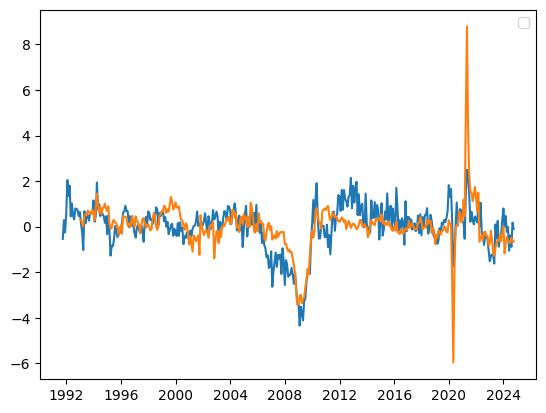

In [100]:
data_norm = (data - data.mean()) / data.std()
plt.plot(data_norm.index, data_norm['housing_starts'])
plt.plot(data_norm.index, data_norm['retail_sales'])
plt.legend()
plt.show()

In [101]:
data_edited = data.copy()

#data_edited['ism_services'] = data_edited['ism_services'].shift(-1)
#data_edited['ism_mfg'] = data_edited['ism_mfg'].shift(-1)
#data_edited['mfg_hours'] = data_edited['mfg_hours'].shift(-1)
#data_edited['copper'] = data_edited['copper'].shift(1)

data_quarterly_raw = data_edited.resample('Q').mean()

In [102]:
#data_quarterly_raw['ceo_confidence'] = qtr_factset_df[['ceo_confidence']]
#data_quarterly_raw['eps_growth'] = qtr_factset_df[['eps_growth']]
data_quarterly_raw['sloos'] = qtr_factset_df[['sloos']]
data_quarterly_raw['real_gdp'] = real_gdp[::-1] / real_gdp[::-1].shift(4) - 1

In [103]:
data_quarterly = data_quarterly_raw.copy().dropna()

In [104]:
#data_quarterly['ceo_confidence'] = data_quarterly['ceo_confidence'].shift(1)
#data_quarterly['fcig'] = data_quarterly['fcig'].shift(2)
#data_quarterly['sloos'] = data_quarterly['sloos'].shift(1)
#data_quarterly['consumer_expectations'] = data_quarterly['consumer_expectations'].shift(2)
#data_quarterly['ism_services'] = data_quarterly['ism_services'].shift(1)
#data_quarterly['ism_mfg'] = data_quarterly['ism_mfg'].shift(2)
#data_quarterly['yield_curve'] = data_quarterly['yield_curve'].shift(5)
#data_quarterly['expectations_vs_present'] = data_quarterly['expectations_vs_present'].shift(5)
#data_quarterly['credit_spreads'] = data_quarterly['credit_spreads'].shift(2)
#data_quarterly['claims'] = data_quarterly['claims'].shift(1)
#data_quarterly['cc_claims'] = data_quarterly['cc_claims'].shift(1)
#data_quarterly['housing_permits'] = data_quarterly['housing_permits'].shift(2)
#data_quarterly['housing_starts'] = data_quarterly['housing_starts'].shift(4)
#data_quarterly['new_orders'] = data_quarterly['new_orders'].shift(1)
#data_quarterly['ind_pro'] = data_quarterly['ind_pro'].shift(1)
#data_quarterly['consumer_new_orders'] = data_quarterly['consumer_new_orders'].shift(1)
#data_quarterly['mfg_hours'] = data_quarterly['mfg_hours'].shift(1)
#data_quarterly['copper'] = data_quarterly['copper'].shift(1)
#data_quarterly['oil'] = data_quarterly['oil'].shift(1)
#data_quarterly['gas'] = data_quarterly['gas'].shift(1)
#data_quarterly['real_gdp'] = data_quarterly['real_gdp'].shift(1)
#data_quarterly['retail_sales'] = data_quarterly['retail_sales'].shift(1)
#data_quarterly['pce'] = data_quarterly['pce'].shift(1)
data_quarterly.dropna(inplace=True)

#data_quarterly = data_quarterly.drop(columns = ['oil', 'gas','housing_permits','yield_curve', 'consumer_expectations','credit_spreads','cc_claims'])

In [110]:
data_quarterly[['stocks','ind_pro','housing_starts','real_gdp','nfp','personal_income','retail_sales',]].corr()

,stocks,ind_pro,housing_starts,real_gdp,nfp,personal_income,retail_sales
stocks,1.000000,0.667971,0.528544,0.650179,0.395281,0.520101,0.692161
ind_pro,0.667971,1.000000,0.505785,0.850225,0.739262,0.692190,0.728013
housing_starts,0.528544,0.505785,1.000000,0.520198,0.324991,0.401633,0.678850
real_gdp,0.650179,0.850225,0.520198,1.000000,0.807345,0.716930,0.798685
nfp,0.395281,0.739262,0.324991,0.807345,1.000000,0.647599,0.495557
personal_income,0.520101,0.692190,0.401633,0.716930,0.647599,1.000000,0.595782
retail_sales,0.692161,0.728013,0.678850,0.798685,0.495557,0.595782,1.000000


In [161]:
data_quarterly.corr()['personal_income']

gas                        0.241320
oil                        0.172036
credit_spreads             0.078067
mfg_hours                  0.368672
new_orders                 0.587448
housing_permits            0.354172
claims                    -0.375608
ind_pro                    0.692190
housing_starts             0.401633
nfp                        0.647599
unemployment              -0.636131
employment_ratio          -0.604092
retail_sales               0.595782
pce                        0.667182
capacity_utilization       0.524520
personal_income            1.000000
stocks                     0.520101
ism_mfg                    0.176511
ism_services               0.540474
expectations_vs_present   -0.623148
sloos                     -0.404261
real_gdp                   0.716930
Name: personal_income, dtype: float64

## Nowcasting Model

In [219]:
monthly_input = data.copy().drop(columns=['stocks','new_orders','capacity_utilization','ism_mfg','employment_ratio','oil', 'gas','credit_spreads'])
quarterly_input = qtr_factset_df.copy().drop(columns=['eps_growth','ceo_confidence','sloos'])
#quarterly_input['real_gdp'] = (np.log(real_gdp[::-1]) - np.log(real_gdp[::-1].shift(4)))# * 4
quarterly_input['real_gdp'] = real_gdp[::-1] / real_gdp[::-1].shift(4) - 1

#monthly_input = monthly_input.drop(columns=['credit_spreads',
#                                            'consumer_expectations'])

#for i in range(5*3):
#    col_names = ['date'] + list(monthly_input.columns)
#    new_row = pd.DataFrame([[np.nan]*len(col_names)], columns = col_names)
#    new_row['date'] = monthly_input.index[-1] + MonthEnd(1)
#    new_row = new_row.set_index('date')
#    monthly_input = pd.concat([monthly_input, new_row])

#for i in range(3):
#    col_names = ['date'] + list(quarterly_input.columns)
#    new_row = pd.DataFrame([[np.nan]*len(col_names)], columns = col_names)
#    new_row['date'] = quarterly_input.index[-1] + MonthEnd(3)
#    new_row = new_row.set_index('date')
#    quarterly_input = pd.concat([quarterly_input, new_row])

In [220]:
#quarterly_input['ceo_confidence'] = quarterly_input['ceo_confidence'].shift(2)
#quarterly_input['sloos'] = quarterly_input['sloos'].shift(1)
#quarterly_input['real_gdp'] = quarterly_input['real_gdp'].shift(1)
#monthly_input['consumer_expectations'] = monthly_input['consumer_expectations'].shift(2*3)
#monthly_input['ism_services'] = monthly_input['ism_services'].shift(3*3)
#monthly_input['ism_mfg'] = monthly_input['ism_mfg'].shift(3*3)
#monthly_input['yield_curve'] = monthly_input['yield_curve'].shift(5*3)
#monthly_input['credit_spreads'] = monthly_input['credit_spreads'].shift(2*3)
#monthly_input['claims'] = monthly_input['claims'].shift(1*3)
#monthly_input['expectations_vs_present'] = monthly_input['expectations_vs_present'].shift(5*3)
#monthly_input['cc_claims'] = monthly_input['cc_claims'].shift(1*3)
#monthly_input['housing_permits'] = monthly_input['housing_permits'].shift(2*3)
#monthly_input['new_orders'] = monthly_input['new_orders'].shift(1*3)
#monthly_input['retail_sales'] = monthly_input['retail_sales'].shift(1*3)
#monthly_input['ind_pro'] = monthly_input['ind_pro'].shift(1*3)
#monthly_input['consumer_new_orders'] = monthly_input['consumer_new_orders'].shift(1*3)
#monthly_input['mfg_hours'] = monthly_input['mfg_hours'].shift(2*3)
#monthly_input['copper'] = monthly_input['copper'].shift(2*3)
#monthly_input['oil'] = monthly_input['oil'].shift(1*3)
#monthly_input['gas'] = monthly_input['gas'].shift(1*3)

#monthly_input = monthly_input[monthly_input.index >= '1997-07-31']
#monthly_input = monthly_input[monthly_input.index >= '1998-10-31']
#quarterly_input = quarterly_input[quarterly_input.index >= '1995-12-31']
monthly_input = monthly_input[monthly_input.index >= '1998-10-31']
#monthly_input = monthly_input[monthly_input.index <= '2024-06-30']
quarterly_input = quarterly_input[quarterly_input.index >= '1998-12-31']

In [221]:
factors = {#'eps_growth': ['Global'],
           'real_gdp': ['Global'],
           #'copper': ['Global', 'Commodities'],
           #'oil': ['Global', 'Energy Prices'],
           #'gas': ['Global', 'Energy Prices'],
           'mfg_hours': ['Global', 'Manufacturing'],
           'new_orders': ['Global', 'Manufacturing'],
           #'consumer_new_orders': ['Global', 'Manufacturing'],
           'ind_pro': ['Global', 'Manufacturing'],
           #'ism_mfg': ['Global', 'Manufacturing'],
           #'capacity_utilization': ['Global','Manufacturing'],
           'retail_sales': ['Global', 'Consumption and Housing'],
           'pce': ['Global', 'Consumption and Housing'],
           'expectations_vs_present': ['Global', 'Sentiment and Employment'],
           'ism_services': ['Global','Consumption and Housing'],
           #'business_inventories': ['Global','Consumption and Non-Manufacturing'],
           #'ism_services': ['Global','Consumption and Non-Manufacturing'],
           'housing_starts': ['Global','Consumption and Housing'],
           'housing_permits': ['Global','Consumption and Housing'],
           #'average_hourly_earnings': ['Global','Income'],
           #'disposable_income': ['Global','Personal Income'],
           #'personal_income': ['Global','Personal Income'],
           #'ceo_confidence': ['Global', 'Sentiment and Financial Conditions'],
           #'sloos': ['Global', 'Financial Conditions'],
           'nfp': ['Global', 'Sentiment and Employment'],
           'unemployment': ['Global', 'Sentiment and Employment'],
           'claims': ['Global', 'Sentiment and Employment'],
           'personal_income': ['Global', 'Consumption and Housing'],
           #'cc_claims': ['Global', 'Labor'],
           #'yield_curve': ['Global', 'Sentiment and Financial Conditions'],
           #'stocks': ['Global'],
           #'credit_spreads': ['Global', 'Financial Conditions'],
          }
factor_orders = {'Global': 3}
factor_multiplicities = {'Global': 1}

In [222]:
monthly_input.index.freq='M'
quarterly_input.index.freq='Q'

#if quarterly_input[-1:].isna().any() is True:
#    cutoff = 2
#else:
#    cutoff = 1

#cutoff_date = quarterly_input.index[-cutoff]

cutoff = 1
cutoff_date = quarterly_input.dropna().index[-cutoff]


In [223]:
quarterly_input.iloc[-1,:] = np.nan

In [224]:
#cutoff = 1
#const_pre = np.ones(len(data)-cutoff)
model = sm.tsa.DynamicFactorMQ(monthly_input[monthly_input.index <= cutoff_date], endog_quarterly=quarterly_input[quarterly_input.index <= cutoff_date], factors=factors, factor_orders=2, factor_multiplicities=factor_multiplicities, freq = 'M')#, enforce_stationarity=False)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Model Specification: Dynamic Factor Model                         
===========================================================================================
Model:                Dynamic Factor Model   # of monthly variables:                     12
                   + 4 factors in 4 blocks   # of quarterly variables:                    1
                   + Mixed frequency (M/Q)   # of factor blocks:                          4
                     + AR(1) idiosyncratic   Idiosyncratic disturbances:              AR(1)
Sample:                            1998-10   Standardize variables:                    True
                                 - 2024-09                                                 
                               Observed variables / factor loadings                              
=================================================================================================
          Dep. variable     Global Consumption and Housing Sentiment and Employment Manufacturing
-------------------------------------------------------------------------------------------------
              mfg_hours       X                                                           X      
        housing_permits       X               X                                                  
                 claims       X                                       X                          
                ind_pro       X                                                           X      
         housing_starts       X               X                                                  
                    nfp       X                                       X                          
           unemployment       X                                       X                          
           retail_sales       X               X                                                  
                    pce       X               X                                                  
        personal_income       X               X                                                  
           ism_services       X               X                                                  
expectations_vs_present       X                                       X                          
               real_gdp       X                                                                  
           Factor blocks:          
===================================
                   block      order
-----------------------------------
                  Global          2
 Consumption and Housing          2
Sentiment and Employment          2
           Manufacturing          2
===================================
"""

In [225]:
results = model.fit(maxiter=1000000, disp=100)

print(results.summary())

EM start iterations, llf=-1708.5
EM iteration 100, llf=-1433, convergence criterion=5.3519e-06
EM converged at iteration 155, llf=-1432.8, convergence criterion=9.851e-07 < tolerance=1e-06
                               Dynamic Factor Results                               
Dep. Variable:     "mfg_hours", and 12 more   No. Observations:                  312
Model:                 Dynamic Factor Model   Log Likelihood               -1432.779
                    + 4 factors in 4 blocks   AIC                           2991.558
                    + Mixed frequency (M/Q)   BIC                           3227.368
                      + AR(1) idiosyncratic   HQIC                          3085.804
Date:                      Thu, 31 Oct 2024   EM Iterations                      155
Time:                              10:55:05                                         
Sample:                          10-31-1998                                         
                               - 09-30-2024   

In [226]:
results.save('gdp_model.pkl')

In [227]:
#if cutoff > 2:
#    results_appended = results.append(endog = monthly_input[monthly_input.index > cutoff_date], 
#                                      endog_quarterly = quarterly_input[quarterly_input.index > cutoff_date])
#else:
results_appended = results

# Specify the number of steps ahead you want to forecast
steps_ahead = 12  # For example, forecasting 12 months ahead
const_forecast = np.ones(steps_ahead)
# Generate forecasts
forecasts = results_appended.forecast(steps=steps_ahead)

forecast_dates = [cutoff_date + MonthEnd(i) for i in range(1, steps_ahead + 1)]

forecasts.index = forecast_dates

# The 'forecasts' variable now contains the forecasted values for each variable for the next 12 months
print(forecasts)


            mfg_hours  housing_permits    claims   ind_pro  housing_starts  \
2024-10-31  -0.000765        -0.032230  0.029625 -0.005449       -0.038621   
2024-11-30  -0.000854        -0.020953  0.027860 -0.004322       -0.022594   
2024-12-31  -0.000902        -0.014820  0.024193 -0.003306       -0.018603   
2025-01-31  -0.000965        -0.010872  0.019985 -0.002438       -0.014324   
2025-02-28  -0.001041        -0.008169  0.015902 -0.001701       -0.011572   
2025-03-31  -0.001122        -0.006277  0.012180 -0.001068       -0.009559   
2025-04-30  -0.001201        -0.004937  0.008896 -0.000514       -0.008128   
2025-05-31  -0.001272        -0.003984  0.006049 -0.000017       -0.007096   
2025-06-30  -0.001331        -0.003301  0.003607  0.000439       -0.006351   
2025-07-31  -0.001376        -0.002812  0.001524  0.000867       -0.005810   
2025-08-31  -0.001405        -0.002463 -0.000250  0.001275       -0.005418   
2025-09-30  -0.001420        -0.002214 -0.001761  0.001668      

## Update Forecast

In [228]:
#start_date = str(data.index[-1])[:7]
#end_date = str(data.index[-1] + timedelta(32))[:7]
def get_news(data, data_quarterly, results, lookback=1, steps_ahead = 1):
    start_date = data_quarterly.dropna().index[-lookback]
    print(start_date)
    end_date = start_date + MonthEnd(steps_ahead*3)
    #end_date = start_date + relativedelta(months=lookback*3+1)
    #end_date = datetime(end_date.year, end_date.month, 1) - timedelta(days=1)
    print(end_date)
    #print(results.summary())

    #const_post_plus1 = np.ones(len(data) + 1)
    news = results.news(data, endog_quarterly = data_quarterly, start=start_date, end=end_date)
    return news

news = get_news(monthly_input, quarterly_input, results_appended)

print(news.summary())

2024-06-30 00:00:00
2024-09-30 00:00:00
                                      News                                     
Model:                DynamicFactorMQ   Original sample:                1998-10
Date:                Thu, 31 Oct 2024                                 - 2024-09
Time:                        10:55:06   Update through:                 2024-10
                                        # of revisions:                       0
                                        # of new datapoints:                  1
                                  Impacts                                  
impact date impacted variable estimate (prev) impact of news estimate (new)
---------------------------------------------------------------------------
    2024-07          real_gdp            0.03           0.00           0.03
    2024-08          real_gdp            0.02           0.00           0.02
    2024-09               pce            0.03          -0.00           0.03
        NaT   personal_i

In [229]:
def update_forecast_data(forecast_df, news):#,length=2):
    #if length < 2:
    #    length = 2
    
    new_df = forecast_df.copy()
    #num_cols = len(new_df.columns)
    for i in range(len(news.impacts)):
        revision_date = news.impacts.index[i][0]
        revision_date = pd.to_datetime(str(revision_date) + "-01") + MonthEnd(1)
        #print(revision_date)
        col_name = news.impacts.index[i][1]
        new_df.loc[revision_date, col_name] = news.impacts.iloc[i,4]
    return new_df


def combine_data(history_df, forecast_df):
    #print(data)
    num_cols = len(history_df.columns)
    if num_cols == len(forecast_df.columns):
        new_df = pd.concat([history_df, forecast_df])
        #new_df = new_df[~new_df.index.duplicated(keep='first')]
        for i in range(num_cols):
            for j in range(1, len(forecast_df)+1):
                if np.isnan(new_df.iloc[-j,i]):
                    new_df.iloc[-j,i] = forecast_df.iloc[-j,i]
        return new_df
    else:
        raise ValueError()

new_forecasts = update_forecast_data(forecasts, news)
#new_forecasts.index = new_forecasts.index.to_timestamp('M')
new_forecasts_quarterly = new_forecasts[quarterly_input.columns].resample('Q').last()
new_data = combine_data(quarterly_input, new_forecasts_quarterly)
new_data.tail(10)

,real_gdp
2023-09-30,0.032363
2023-12-31,0.031962
2024-03-31,0.029018
2024-06-30,0.030368
2024-09-30,NaN
2024-09-30,0.021752
2024-12-31,0.020823
2025-03-31,0.021870
2025-06-30,0.022577
2025-09-30,0.022949


## Recursive Estimation

In [230]:
def recursive_estimation(data_monthly, data_quarterly, y_names: list, factors = 1, factor_orders = 3, factor_multiplicities = 1, steps_ahead = 1, start_point = 50, missing_vars_q = None, missing_vars_m = None):

    for y_name in y_names:
        if (y_name not in data_monthly.columns) and (y_name not in data_quarterly.columns):
            raise ValueError()
    
    # Find missing vars based on distance from last quarter of full data if no missing vars are inputted 
   # cutoff_date = data_quarterly.dropna().index[-1]
    #next_quarter = cutoff_date+MonthEnd(steps_ahead*3)

    num_blanks_q = len(data_quarterly) - len(data_quarterly.dropna())
    if missing_vars_q is None:
        #missing_vars_q = quarterly_input[quarterly_input.index <= next_quarter].iloc[-num_blanks:].isna().reset_index(drop = True)
        missing_vars_q = quarterly_input.iloc[-num_blanks_q:].isna().reset_index(drop = True)

    num_blanks_m = len(data_monthly) - len(data_monthly.dropna())
    if missing_vars_m is None:
        #missing_vars_m = monthly_input[monthly_input.index <= next_quarter].iloc[-num_blanks*3:].isna().reset_index(drop = True)
        missing_vars_m = monthly_input.iloc[-num_blanks_m:].isna().reset_index(drop = True)

    #if data.index[2] != data_quarterly.index[0]:
        

    #all_columns = list(data_monthly.columns) + list(data_quarterly.columns)
    errors_df = pd.DataFrame(0, index=range(steps_ahead), columns=data_quarterly.columns)
    preds_dfs = [pd.DataFrame(columns=data_quarterly.columns)]*steps_ahead

    if steps_ahead > num_blanks_q:
        T = steps_ahead
    else:
        T = num_blanks_q
    
    for i in range(start_point, len(data_quarterly.dropna())-steps_ahead+1):
    #for i in range(start_point, len(data_quarterly.dropna())-T+1):
        print(len(data_quarterly.dropna()) - i)
        #print(i)
        print(f"Training Sample Ending {str(data_quarterly[:i].index[-1])}")
        model = sm.tsa.DynamicFactorMQ(data_monthly[:i*3], endog_quarterly = data_quarterly[:i], factors=factors, factor_orders=factor_orders, factor_multiplicities = factor_multiplicities)#,enforce_stationarity=False)
        results = model.fit(maxiter=100000, disp=100)

        # Generate forecasts and adjust datetime index to be compatible with rest of data
        forecasts = results.forecast(steps=steps_ahead*3)
        forecast_dates = [data_quarterly.index[i-1] + MonthEnd(k) for k in range(1, steps_ahead*3 + 1)]
        forecasts.index = forecast_dates
        #print(forecasts)

        if missing_vars_q.any().any() or missing_vars_m.any().any():

            # Extend monthly data to include "news"
            #new_cutoff_m = (i+steps_ahead)*3
            new_cutoff_m = i*3+num_blanks_m
            new_data_monthly = data_monthly.copy()[:new_cutoff_m]

            # Extend quarterly data to include "news"
            #new_cutoff_q = i_steps_ahead
            new_cutoff_q = i+num_blanks_q
            new_data_quarterly = data_quarterly.copy()[:new_cutoff_q]

            # Replace values in new monthly data with NAs based on inputted missing variables
            for j, _ in enumerate(new_data_monthly.columns):
                for k in range(num_blanks_m):
                    if missing_vars_m.iloc[k, j] == True:
                        new_data_monthly.iloc[i*3+k, j] = np.nan

           # Replace values in new quarterly data with NAs based on inputted missing variables
            for j, _ in enumerate(new_data_quarterly.columns):
                for k in range(num_blanks_q):
                    if missing_vars_q.iloc[k, j] == True:
                        new_data_quarterly.iloc[i+k, j] = np.nan

            news = get_news(new_data_monthly, new_data_quarterly, results, steps_ahead = steps_ahead)
            #print(new_data_quarterly)
            #print(new_data_monthly)
            #print(news.summary())
            forecasts = update_forecast_data(forecasts, news)
            #print(forecasts)
            #forecasts.index = forecasts.index.to_timestamp('M')
            forecasts = forecasts[data_quarterly.columns].resample('Q').last()
            forecasts = forecasts[:steps_ahead]
            #print(forecasts)
            
        # Compare Observed Values with Forecast and Record Results
        observed = data_quarterly.copy()[i:i+steps_ahead]
        has_nans = observed.isna().any().any()
        if not has_nans:
            error = (forecasts - observed).reset_index(drop = True)
            errors_df = errors_df + error**2
        #display(errors_df)
        
        for k in range(steps_ahead):
            preds_dfs[k] = pd.concat([preds_dfs[k], forecasts[k:k+1]])

    errors_df = (errors_df / (len(data_quarterly.dropna()) - start_point - steps_ahead + 1))**0.5
    
    errors_df = errors_df[y_names]
        
    return preds_dfs, errors_df

In [231]:
steps_ahead = 1

#next_quarter = cutoff_date+MonthEnd(steps_ahead*3)

start_index=80
start_point = len(quarterly_input.dropna()) - start_index

num_blanks_q = len(quarterly_input) - len(quarterly_input.dropna())
#missing_vars_q = quarterly_input[quarterly_input.index <= next_quarter].iloc[-num_blanks:].isna().reset_index(drop = True)
missing_vars_q = quarterly_input.iloc[-num_blanks_q:].isna().reset_index(drop = True)

num_blanks_m = len(monthly_input) - len(monthly_input.dropna())
#missing_vars_m = monthly_input[monthly_input.index <= next_quarter].iloc[-num_blanks*3:].isna().reset_index(drop = True)
missing_vars_m = monthly_input.iloc[-num_blanks_m:].isna().reset_index(drop = True)

y_names = ['real_gdp']
preds_dfs, errors_df = recursive_estimation(monthly_input,
                                            quarterly_input,
                                            y_names,
                                            factors = factors,
                                            factor_orders = 2,
                                            factor_multiplicities = factor_multiplicities,
                                            steps_ahead = steps_ahead,
                                            start_point = start_point,
                                            missing_vars_q = missing_vars_q,
                                            missing_vars_m = missing_vars_m)

80
Training Sample Ending 2004-06-30 00:00:00
EM start iterations, llf=-412.52
EM iteration 100, llf=-277.36, convergence criterion=2.5682e-05
EM iteration 200, llf=-276.94, convergence criterion=9.7449e-06
EM iteration 300, llf=-276.73, convergence criterion=5.9715e-06
EM iteration 400, llf=-276.59, convergence criterion=4.3484e-06
EM iteration 500, llf=-276.48, convergence criterion=3.5721e-06
EM iteration 600, llf=-276.39, convergence criterion=3.3144e-06
EM iteration 700, llf=-276.3, convergence criterion=3.6886e-06
EM iteration 800, llf=-276.17, convergence criterion=5.9047e-06
EM iteration 900, llf=-275.9, convergence criterion=1.5727e-05
EM iteration 1000, llf=-275.32, convergence criterion=2.1557e-05
EM iteration 1100, llf=-274.89, convergence criterion=1.0064e-05
EM iteration 1200, llf=-274.7, convergence criterion=4.6583e-06
EM iteration 1300, llf=-274.6, convergence criterion=2.6069e-06
EM iteration 1400, llf=-274.55, convergence criterion=1.6789e-06
EM iteration 1500, llf=-

C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


EM iteration 100, llf=-473, convergence criterion=7.0646e-06
EM iteration 200, llf=-472.71, convergence criterion=2.6763e-06
EM iteration 300, llf=-472.63, convergence criterion=1.3945e-06
EM converged at iteration 384, llf=-472.58, convergence criterion=9.9989e-07 < tolerance=1e-06
2008-09-30 00:00:00
2008-12-31 00:00:00
62
Training Sample Ending 2008-12-31 00:00:00
EM start iterations, llf=-947.98


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


EM iteration 100, llf=-348.89, convergence criterion=3.1942e-05
EM iteration 200, llf=-347.75, convergence criterion=4.5466e-05
EM iteration 300, llf=-346.34, convergence criterion=7.6777e-06
EM converged at iteration 384, llf=-346.27, convergence criterion=9.9031e-07 < tolerance=1e-06
2008-12-31 00:00:00
2009-03-31 00:00:00
61
Training Sample Ending 2009-03-31 00:00:00
EM start iterations, llf=-1012


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


EM iteration 100, llf=-184.43, convergence criterion=6.4646e-06
EM iteration 200, llf=-184.33, convergence criterion=3.8662e-06
EM iteration 300, llf=-184.28, convergence criterion=1.9202e-06
EM iteration 400, llf=-184.26, convergence criterion=1.0478e-06
EM converged at iteration 409, llf=-184.26, convergence criterion=9.9862e-07 < tolerance=1e-06
2009-03-31 00:00:00
2009-06-30 00:00:00
60
Training Sample Ending 2009-06-30 00:00:00
EM start iterations, llf=-992.15


C:\Users\alex.zhang\AppData\Local\anaconda3\envs\transports\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


EM iteration 100, llf=-52.789, convergence criterion=4.5445e-05
EM iteration 200, llf=-52.667, convergence criterion=1.1479e-05
EM iteration 300, llf=-52.628, convergence criterion=4.806e-06
EM iteration 400, llf=-52.609, convergence criterion=2.6044e-06
EM iteration 500, llf=-52.598, convergence criterion=1.6327e-06
EM iteration 600, llf=-52.591, convergence criterion=1.1225e-06
EM converged at iteration 636, llf=-52.589, convergence criterion=9.9731e-07 < tolerance=1e-06
2009-06-30 00:00:00
2009-09-30 00:00:00
59
Training Sample Ending 2009-09-30 00:00:00
EM start iterations, llf=-220.1
EM iteration 100, llf=-17.152, convergence criterion=0.00016732
EM iteration 200, llf=-17.009, convergence criterion=4.3177e-05
EM iteration 300, llf=-16.959, convergence criterion=2.0495e-05
EM iteration 400, llf=-16.932, convergence criterion=1.2268e-05
EM iteration 500, llf=-16.915, convergence criterion=8.317e-06
EM iteration 600, llf=-16.903, convergence criterion=6.0948e-06
EM iteration 700, llf

In [232]:
errors_df

,real_gdp
0,0.010423


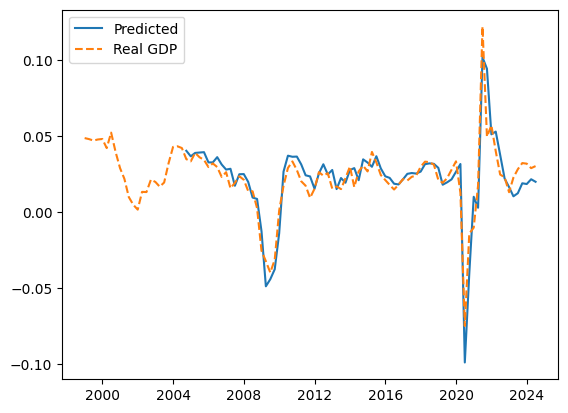

In [233]:
plt.plot(preds_dfs[0].index, preds_dfs[0]['real_gdp'], label='Predicted')
plt.plot(quarterly_input.dropna().index, quarterly_input.dropna()['real_gdp'], label='Real GDP', linestyle='--')
plt.legend()
plt.show()

In [216]:
preds_dfs[0]['real_gdp'].tail(10)

2022-03-31    0.055522
2022-06-30    0.037988
2022-09-30    0.024530
2022-12-31    0.018641
2023-03-31    0.012735
2023-06-30    0.015018
2023-09-30    0.019452
2023-12-31    0.019318
2024-03-31    0.021184
2024-06-30    0.020664
Freq: Q-DEC, Name: real_gdp, dtype: float64

In [217]:
quarterly_input['real_gdp'].dropna().tail(10)

date
2022-03-31    0.040149
2022-06-30    0.024789
2022-09-30    0.022964
2022-12-31    0.013163
2023-03-31    0.022808
2023-06-30    0.028295
2023-09-30    0.032363
2023-12-31    0.031962
2024-03-31    0.029018
2024-06-30    0.030368
Freq: Q-DEC, Name: real_gdp, dtype: float64

In [218]:
def get_r_squared(var_name, pred_df, actual_df):
    r2 = np.round(np.corrcoef(pred_df[var_name], actual_df[var_name])[1][0]**2*100, 1)
    return r2
         
#mse = errors_df[var_name][0]
r2 = get_r_squared('real_gdp', preds_dfs[0], quarterly_input.dropna()[start_point:])

#print(f"Root Mean Squared Error: {mse}")
print(f"R-Squared : {r2}")

R-Squared : 82.5
